In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.1
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();

In [4]:
# dataset properties
print("Values per Image:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image: 784
Number of images for training: 46900


In [5]:
#subsample if necessary
trainSampleSize = 400;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample5(28,28,1,
                               3,3,3,3,3,3,3,3)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 2 Out Height: 26 Out Width: 26
Conv In Depth: 2 In Height: 26 In Width: 26 Out Depth: 2 Out Height: 24 Out Width: 24
Conv In Depth: 2 In Height: 24 In Width: 24 Out Depth: 2 Out Height: 22 Out Width: 22
Conv In Depth: 2 In Height: 22 In Width: 22 Out Depth: 2 Out Height: 20 Out Width: 20
Conv In Depth: 2 In Height: 20 In Width: 20 Out Depth: 4 Out Height: 18 Out Width: 18
Conv In Depth: 4 In Height: 18 In Width: 18 Out Depth: 4 Out Height: 16 Out Width: 16
Conv In Depth: 4 In Height: 16 In Width: 16 Out Depth: 4 Out Height: 14 Out Width: 14
Conv In Depth: 4 In Height: 14 In Width: 14 Out Depth: 5 Out Height: 12 Out Width: 12
Tran In Depth: 5 In Height: 12 In Width: 12 Out Depth: 4 Out Height: 14 Out Width: 14
Tran In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 16 Out Width: 16
Tran In Depth: 4 In Height: 16 In Width: 16 Out Depth: 4 Out Height: 18 Out Width: 18
Tran In Depth: 4 In Height: 18 In Width: 18 Out Depth:

In [8]:
# train and test (prints some result and returns test results)
deepAE.Train(trXSub,trXSub,0.00001,200)

Loss of a given sample at epoch: 0
0.00817198
Loss of a given sample at epoch: 1
0.0093472
Loss of a given sample at epoch: 2
0.0100091
Loss of a given sample at epoch: 3
0.012149
Loss of a given sample at epoch: 4
0.00605758
Loss of a given sample at epoch: 5
0.0119246
Loss of a given sample at epoch: 6
0.00689651
Loss of a given sample at epoch: 7
0.00931406
Loss of a given sample at epoch: 8
0.00502244
Loss of a given sample at epoch: 9
0.00450222
Loss of a given sample at epoch: 10
0.00400106
Loss of a given sample at epoch: 11
0.00758576
Loss of a given sample at epoch: 12
0.00217699
Loss of a given sample at epoch: 13
0.011251
Loss of a given sample at epoch: 14
0.00419231
Loss of a given sample at epoch: 15
0.0138077
Loss of a given sample at epoch: 16
0.0109517
Loss of a given sample at epoch: 17
0.00689459
Loss of a given sample at epoch: 18
0.00299733
Loss of a given sample at epoch: 19
0.00436194
Loss of a given sample at epoch: 20
0.00569922
Loss of a given sample at epoch:

0.0059463
Loss of a given sample at epoch: 174
0.00131028
Loss of a given sample at epoch: 175
0.00275037
Loss of a given sample at epoch: 176
0.0070412
Loss of a given sample at epoch: 177
0.00322065
Loss of a given sample at epoch: 178
0.00315609
Loss of a given sample at epoch: 179
0.00259184
Loss of a given sample at epoch: 180
0.000701035
Loss of a given sample at epoch: 181
0.00166781
Loss of a given sample at epoch: 182
0.00314056
Loss of a given sample at epoch: 183
0.0018789
Loss of a given sample at epoch: 184
0.00205201
Loss of a given sample at epoch: 185
0.00401802
Loss of a given sample at epoch: 186
0.00398988
Loss of a given sample at epoch: 187
0.00314019
Loss of a given sample at epoch: 188
0.00172181
Loss of a given sample at epoch: 189
0.00811358
Loss of a given sample at epoch: 190
0.00139282
Loss of a given sample at epoch: 191
0.0027288
Loss of a given sample at epoch: 192
0.00576151
Loss of a given sample at epoch: 193
0.00266659
Loss of a given sample at epoch:

testing:
784rows


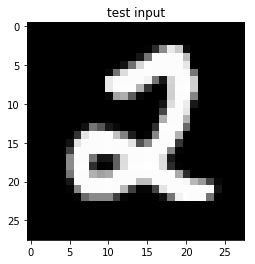

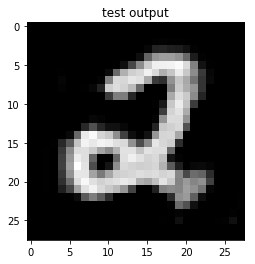

In [9]:
sampleNum = 8
deepAEOut = deepAE.Test(trXSub[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(trXSub[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
       [3.18789236e-03],
